In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import datetime

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('../data/processed/indiv_1.csv')

In [81]:
df.head()

,acc_x_mean,acc_x_std,acc_x_cv,acc_y_mean,acc_y_std,acc_y_cv,acc_z_mean,acc_z_std,acc_z_cv,state
0,-4.842622,3.760037,-0.776446,-5.120616,3.664304,-0.715598,-3.289126,3.688173,-1.121323,Rest
1,-4.739995,3.897430,-0.822243,-5.012914,3.780589,-0.754170,-3.193830,3.827198,-1.198310,Rest
2,-4.705598,3.798199,-0.807166,-4.851644,3.865999,-0.796843,-2.959819,3.904244,-1.319082,Rest
3,-4.278739,4.277498,-0.999710,-4.536434,4.260522,-0.939179,-2.773737,3.995986,-1.440650,Rest
4,-4.386441,4.066364,-0.927030,-4.761423,4.013407,-0.842901,-2.852681,4.023659,-1.410483,Rest


In [82]:
import sklearn
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

In [83]:
data = df[[col for col in df.columns if col.startswith('acc')]].as_matrix()
target_str = df['state']
# encode classes as numerical labels
le = sklearn.preprocessing.LabelEncoder()
class_names = target_str.unique()
le.fit(class_names);
target = le.transform(target_str)
# print assigned class labels
print(zip(range(len(target_str.unique())), le.inverse_transform(range(len(target_str.unique())))))

[(0, 'Feed'), (1, 'Fly'), (2, 'Rest')]


In [88]:
clf = svm.SVC(class_weight='balanced') # Feed is much less common than the other classes, so we need to balance weights

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.75, test_size=0.25)
clf.fit(X_train, y_train)
expected = y_test
predicted = clf.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.53      0.73      0.62        11
          1       0.98      0.97      0.98       955
          2       1.00      1.00      1.00      4419

avg / total       0.99      0.99      0.99      5385

[[   8    3    0]
 [   7  931   17]
 [   0   16 4403]]


In [62]:
clf

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
C_values = [3.0]
gamma_values = [7.0, 8.0, 9.0]

grid = GridSearchCV(estimator=clf, param_grid=dict(C=C_values, gamma=gamma_values))

grid.fit(data, target)
print('Best score: %f' % grid.best_score_)
print('Best params: C=%f, gamma=%f' % (grid.best_estimator_.C, grid.best_estimator_.gamma))

Best score: 0.994415
Best params: C=3.000000, gamma=8.000000


In [91]:
clf_opt = svm.SVC(class_weight='balanced')#, C=3.0,gamma=7.0,)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.75, test_size=0.25)
clf_opt.fit(X_train, y_train)
expected = y_test
predicted = clf_opt.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.41      0.78      0.54         9
          1       0.98      0.97      0.97       938
          2       1.00      1.00      1.00      4438

avg / total       0.99      0.99      0.99      5385

[[   7    2    0]
 [  10  909   19]
 [   0   17 4421]]


In [93]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[   7    2    0]
 [  10  909   19]
 [   0   17 4421]]


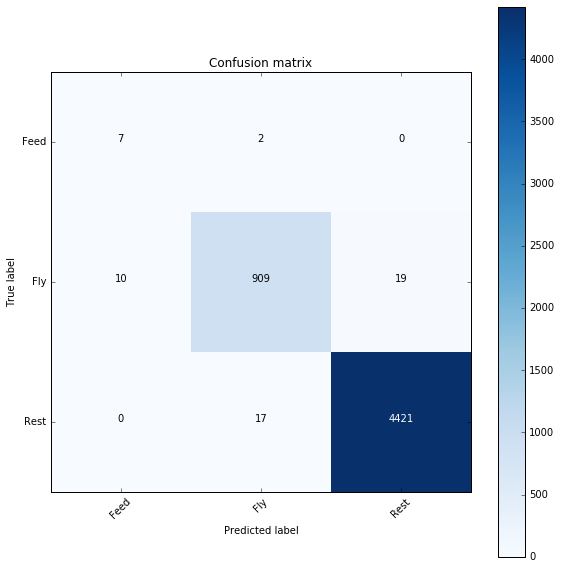

In [94]:
cm = metrics.confusion_matrix(expected, predicted)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, classes=['Feed', 'Fly', 'Rest'])

Classifier with 2 features only for plotting

In [95]:
dfs = pd.DataFrame()
dfs['acc_mean'] = df[['acc_x_mean', 'acc_y_mean', 'acc_z_mean']].apply(lambda x: np.mean(x), axis='columns')
dfs['acc_std'] = df[['acc_x_std', 'acc_y_std', 'acc_z_std']].apply(lambda x: np.mean(x), axis='columns')
dfs['state'] = df['state']

In [102]:
data_sample = dfs[[col for col in dfs.columns if col.startswith('acc')]].as_matrix()
target_sample = dfs['state']

le = sklearn.preprocessing.LabelEncoder()
le.fit(target_sample.unique());
target_sample_num = le.transform(target_sample)
print(zip(range(len(target_sample.unique())), le.inverse_transform(range(len(target_sample.unique())))))

[(0, 'Feed'), (1, 'Fly'), (2, 'Rest')]


In [103]:
clf_sample = svm.SVC(class_weight='balanced')

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data_sample, target_sample_num, train_size=0.75, test_size=0.25)
clf_sample.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [105]:
expected = y_test
predicted = clf_sample.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.37      0.79      0.50        14
          1       0.97      0.94      0.96       957
          2       0.99      0.99      0.99      4414

avg / total       0.99      0.99      0.99      5385

[[  11    3    0]
 [  19  904   34]
 [   0   23 4391]]


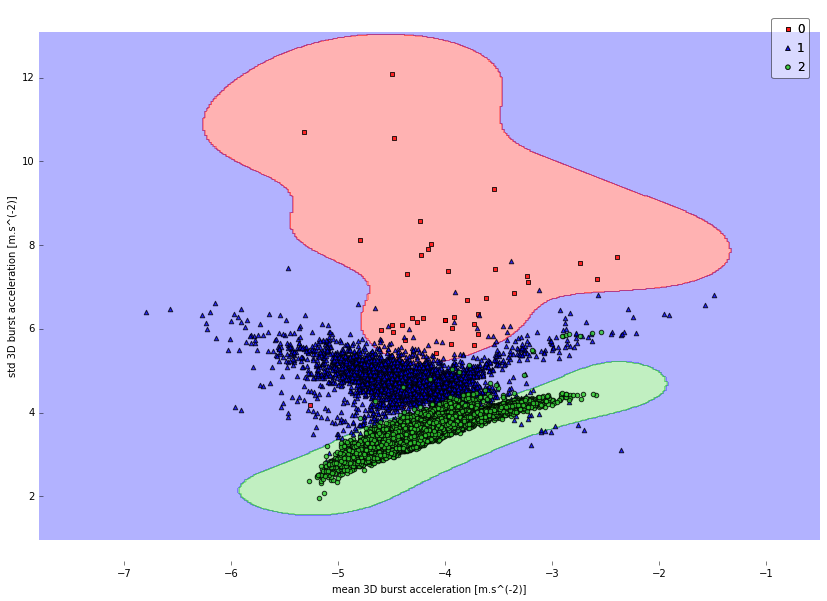

In [106]:
from mlxtend.evaluate import plot_decision_regions
fig = plt.figure(figsize=(14,10))
ax = fig.gca()
ax.set_xlabel('mean 3D burst acceleration [m.s^(-2)]')
ax.set_ylabel('std 3D burst acceleration [m.s^(-2)]')
fig = plot_decision_regions(data_sample, target_sample_num, clf=clf_sample)